In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Initialize the browser
browser = Browser('chrome', executable_path=r"C:\Users\Brian Haynes\Downloads\chromedriver_win32\chromedriver.exe")

# Visit the Mars Facts site
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

# Get the HTML code
html = browser.html
temp_soup = soup(html, 'html.parser')

In [3]:
# pull table
rows = temp_soup.find_all('tr', class_ = 'data-row')

In [5]:
# Create an empty list

empty_list = []

In [6]:
# Extract all rows of data
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    empty_list.append(row)


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
pd.DataFrame(empty_list)

,0,1,2,3,4,5,6
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
mars_dataframe = pd.DataFrame(empty_list, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])


In [10]:
# Examine data type of each column
mars_dataframe.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_dataframe.terrestrial_date = pd.to_datetime(mars_dataframe.terrestrial_date)
mars_dataframe.terrestrial_date

0      2012-08-16
1      2012-08-17
2      2012-08-18
3      2012-08-19
4      2012-08-20
          ...    
1862   2018-02-23
1863   2018-02-24
1864   2018-02-25
1865   2018-02-26
1866   2018-02-27
Name: terrestrial_date, Length: 1867, dtype: datetime64[ns]

In [12]:
mars_dataframe.sol= mars_dataframe.sol.astype('int')

In [13]:
mars_dataframe.ls= mars_dataframe.ls.astype('int')

In [14]:
mars_dataframe.month= mars_dataframe.month.astype('int')

In [15]:
mars_dataframe.min_temp = mars_dataframe.min_temp.astype('float')

In [16]:
mars_dataframe.pressure = mars_dataframe.pressure.astype('float')

In [17]:
# Confirm type changes were successful by examining data types again
mars_dataframe.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [18]:
mars_dataframe

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [19]:
# 1. How many months are there on Mars?
months_on_mars = mars_dataframe["month"].value_counts().sort_index()
months_on_mars


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [20]:
# 2. How many Martian days' worth of data are there?
days_of_data = len(mars_dataframe)
days_of_data

1867

In [21]:
# 3. What is the average low temperature by month?
month_min_temp = mars_dataframe.groupby(['month']).mean()
month_min_temp['min_temp']

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

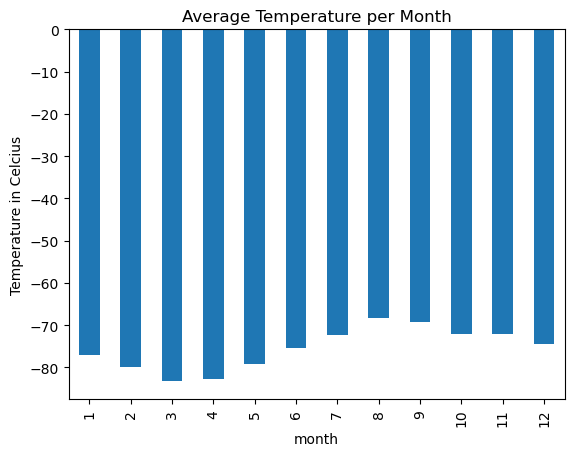

In [22]:
# Plot the average temperature by month
month_min_temp['min_temp'].plot(kind = 'bar')
plt.ylabel('Temperature in Celcius')
plt.title('Average Temperature per Month')

plt.show()

In [23]:
# Identify the coldest and hottest months in Curiosity's location
month_min_temp_sorted = month_min_temp['min_temp'].sort_values()
month_min_temp_sorted

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

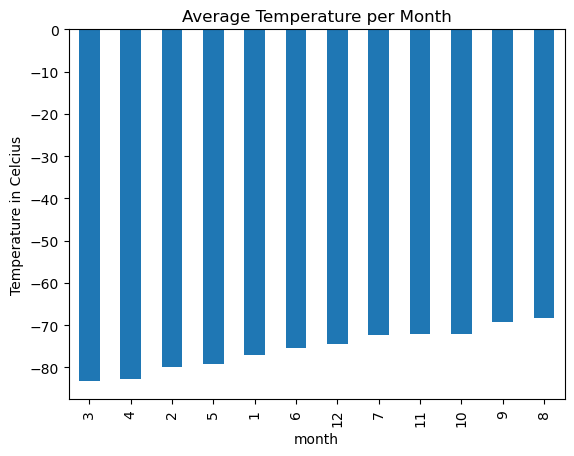

In [24]:
month_min_temp_sorted.plot(kind = 'bar')
plt.ylabel('Temperature in Celcius')
plt.title('Average Temperature per Month')

plt.show()

In [25]:
# 4. Average pressure by Martian month

monthly_avg_pressure = mars_dataframe.groupby('month').mean('pressure')['pressure']
monthly_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

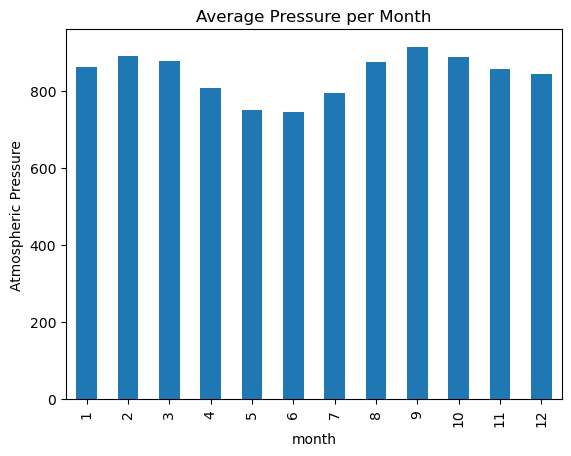

In [27]:
# Plot the average pressure by month
monthly_avg_pressure.plot(kind = 'bar')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure per Month')

plt.show()

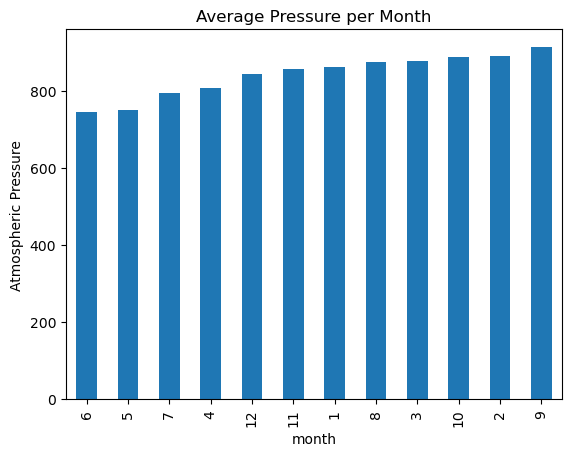

In [28]:
monthly_avg_pressure_sorted = monthly_avg_pressure.sort_values()


monthly_avg_pressure_sorted.plot(kind = 'bar')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure per Month')

plt.show()

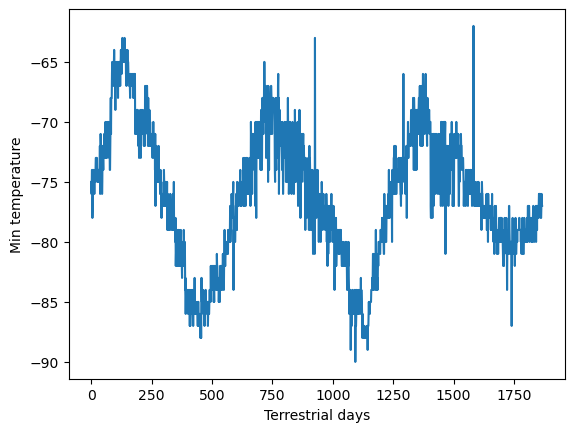

In [32]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(range(days_of_data), mars_dataframe['min_temp'])

plt.xlabel('Terrestrial days')
plt.ylabel('Min temperature')

plt.show()

In [36]:
# Export the DataFrame to a CSV file named 'output.csv'
mars_dataframe.to_csv('output.csv', index=False)